In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load data

df = pd.read_csv(r"C:\Users\rbaue\Desktop\airbnb_clean.csv")
df.head()


,id,name,neighbourhood,latitude,longitude,room_type,property_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,instant_bookable
0,90676,Short North - Italianate Cottage,Neighborhood highlights,39.98366,-83.00252,Entire home/apt,Entire home,128,1,868,5.11,155,t,f
1,591101,Bellows Studio Loft Apartment,Neighborhood highlights,39.96041,-82.98005,Private room,Private room in loft,112,2,342,2.14,339,t,f
2,927867,Full Private Room at the Hostel,Neighborhood highlights,40.01259,-83.00164,Private room,Private room in hostel,105,1,82,0.56,292,f,f
3,1183297,Hannah's Haus**Prime location in German Village**,Neighborhood highlights,39.95164,-82.99434,Entire home/apt,Entire home,253,30,87,1.80,288,t,f
4,1217678,Comfortable rooms in Clintonville 1,Neighborhood highlights,40.03869,-83.01728,Private room,Private room in home,74,1,283,1.90,342,t,f


In [3]:
# Keep numeric only

df_num = df.select_dtypes(include=[np.number])


In [4]:
# Standardize

scaler = StandardScaler()
X = scaler.fit_transform(df_num)


In [5]:
# Elbow

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]


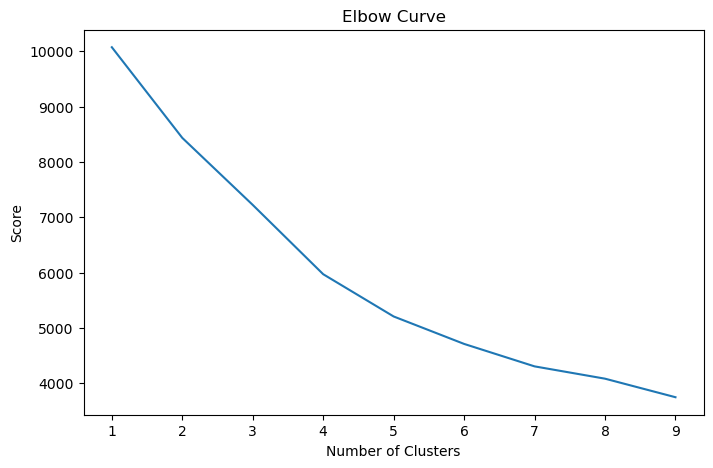

In [6]:
# Elbow plot

plt.figure(figsize=(8,5))
plt.plot(num_cl, score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()


Based on the elbow curve, the optimal number of clusters is **K = 4**.  
This is because the curve shows a sharp decrease in inertia from K = 1 to K = 4, after which the curve begins to flatten.  
Adding more clusters beyond this point would only result in diminishing returns.

In [9]:
# Fit the model

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

In [10]:
df['clusters'] = kmeans.fit_predict(X)
df.head()


,id,name,neighbourhood,latitude,longitude,room_type,property_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,instant_bookable,clusters
0,90676,Short North - Italianate Cottage,Neighborhood highlights,39.98366,-83.00252,Entire home/apt,Entire home,128,1,868,5.11,155,t,f,2
1,591101,Bellows Studio Loft Apartment,Neighborhood highlights,39.96041,-82.98005,Private room,Private room in loft,112,2,342,2.14,339,t,f,2
2,927867,Full Private Room at the Hostel,Neighborhood highlights,40.01259,-83.00164,Private room,Private room in hostel,105,1,82,0.56,292,f,f,1
3,1183297,Hannah's Haus**Prime location in German Village**,Neighborhood highlights,39.95164,-82.99434,Entire home/apt,Entire home,253,30,87,1.80,288,t,f,0
4,1217678,Comfortable rooms in Clintonville 1,Neighborhood highlights,40.03869,-83.01728,Private room,Private room in home,74,1,283,1.90,342,t,f,2


In [11]:
# Distribution check

df["clusters"].value_counts()


clusters
1    701
2    281
0    271
3      6
Name: count, dtype: int64

In [17]:
df["price"] = (
    df["price"]
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)


In [18]:
df["price"].describe()


count     1259.000000
mean       373.557585
std       3334.189609
min         25.000000
25%         85.000000
50%        118.000000
75%        166.000000
max      50028.000000
Name: price, dtype: float64

(0.0, 500.0)

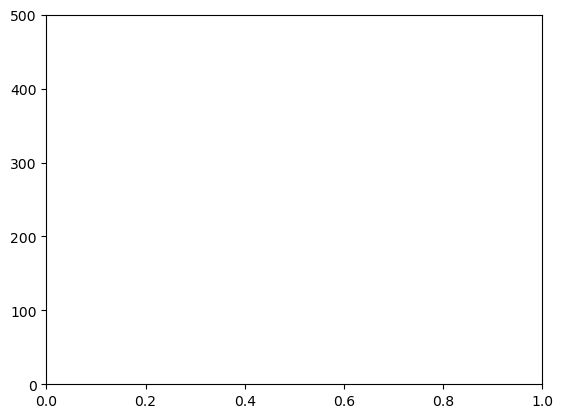

In [19]:
plt.ylim(0, 500)


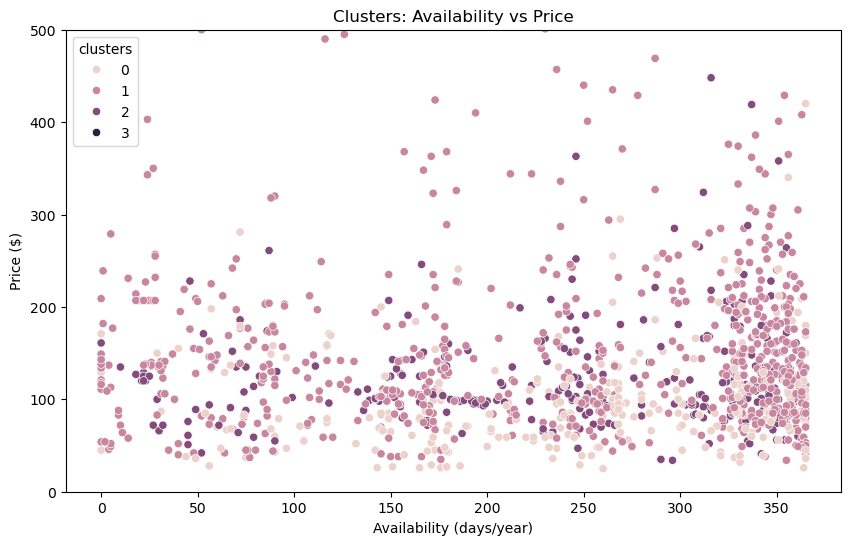

In [20]:
# Plot one

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["availability_365"], y=df["price"], hue=df["clusters"])
plt.title("Clusters: Availability vs Price")
plt.xlabel("Availability (days/year)")
plt.ylabel("Price ($)")
plt.ylim(0, 500)
plt.show()


Interpretation of Scatterplot 1

The clustering algorithm segmented Columbus Airbnb listings into four distinct market groups.

Cluster 3 represents a very small group of ultra-high-price listings with limited availability, likely corresponding to luxury or specialty properties.
Cluster 1 represents the largest segment of moderately priced listings with high availability, reflecting the standard Columbus Airbnb market.
Cluster 0 contains lower-priced, highly available listings, indicating more competitive or budget-oriented properties.
Cluster 2 consists of higher-priced listings with moderate availability, representing premium accommodations.

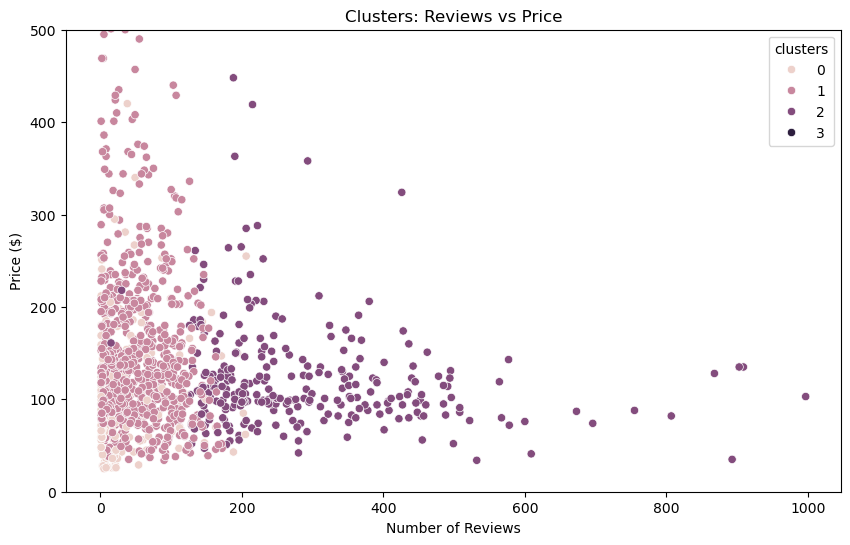

In [21]:
# Plot two

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["number_of_reviews"], y=df["price"], hue=df["clusters"])
plt.title("Clusters: Reviews vs Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.ylim(0, 500)
plt.show()


Interpretation of Scatterplot 2

This scatterplot shows that most highly reviewed listings fall within moderate price ranges, indicating that competitively priced properties tend to receive more bookings and reviews.
Premium and ultra-luxury listings show significantly higher prices but generally lower review counts, suggesting that these properties target niche markets with lower booking frequency.

In [22]:
# Stats

df.groupby("clusters")[["price",
                         "availability_365",
                         "number_of_reviews",
                         "reviews_per_month",
                         "minimum_nights"]].mean().round(2)



,price,availability_365,number_of_reviews,reviews_per_month,minimum_nights
clusters,,,,,
0,101.28,244.03,24.79,0.60,29.76
1,166.86,227.49,55.43,2.11,1.70
2,127.14,233.49,287.74,4.33,2.05
3,48361.33,290.83,9.83,0.54,1.00


Cluster Findings

Cluster 3 represents a very small group of ultra-luxury listings with extremely high average prices and low booking activity, indicating rare niche properties.
Cluster 1 represents the largest segment of moderately priced listings with high availability and steady booking velocity, reflecting the standard Columbus Airbnb market.
Cluster 2 shows the highest booking velocity with moderate prices, indicating highly competitive, high-demand listings.
Cluster 0 contains lower-priced listings with high minimum-night requirements, suggesting longer-stay or budget-oriented accommodations.